# Fire Data

## นำเข้าชุดคำสั่งที่จะใช้งาน

In [1]:
import pandas as pd
import numpy as np
import datetime

## เรียกไฟล์ Excel จาก library ในโฟลเดอร์เดียวกัน

In [2]:
dataframe = pd.read_excel('Fire_Data.xlsx')

## ลองทำการเช็คข้อมูลที่นำเข้า
* ข้อมูลทั้งหมด

In [3]:
dataframe

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


* เรียกดูส่วนที่จะใช้งาน

In [4]:
dataframe['LATITUDE']

0        16.33696
1        16.48906
2        16.93571
3        16.54092
4        16.87473
           ...   
79229    17.81812
79230    17.77545
79231    17.76847
79232    17.77518
79233    18.46766
Name: LATITUDE, Length: 79234, dtype: float64

In [5]:
dataframe['LONGITUDE']

0        98.70137
1        98.73961
2        99.06874
3        98.59869
4        98.63222
           ...   
79229    97.74127
79230    97.85637
79231    97.79116
79232    97.82606
79233    97.94600
Name: LONGITUDE, Length: 79234, dtype: float64

In [6]:
dataframe['ACQ_DATE']

0       2019-12-01
1       2019-12-01
2       2019-12-01
3       2019-12-01
4       2019-12-01
           ...    
79229   2020-04-04
79230   2020-04-04
79231   2020-04-04
79232   2020-04-04
79233   2020-04-04
Name: ACQ_DATE, Length: 79234, dtype: datetime64[ns]

* ดูชนิดของข้อมูลที่นำเข้า

In [7]:
dataframe.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

## ทำการแปลงเวลาจากรูปแบบ datetime64 เป็น int64

In [8]:
dataframe['Convert_DATE'] = pd.to_datetime(dataframe['ACQ_DATE']).astype(np.int64)


* แปลงเวลา ACQ_TIME เป็น ชั่วโมง

In [9]:
dataframe['HOUR'] = pd.to_datetime(dataframe['ACQ_TIME']/100).astype(np.int64)


* แปลงเวลา ACQ_TIME เป็น นาที

In [10]:
dataframe['MIN'] = pd.to_datetime(dataframe['ACQ_TIME']%100).astype(np.int64)


* คำนวณเวลาที่แปลงวันรวมกับชั่วโมงและนาที

In [11]:
dataframe['ACQ_DATETIME'] = pd.to_datetime(dataframe['Convert_DATE']+(dataframe['HOUR']*60*60e9)+(dataframe['MIN']*60e9)).astype(np.int64)


* แปลงเวลาที่คำนวณให้อยู่ในหน่วยนาที

In [12]:
dataframe['zAxis'] = pd.to_datetime(((dataframe['ACQ_DATETIME']/(60e9))-26252640)).astype(np.int64)


* แปลงเวลาที่คำนวณให้อยู่ในหน่วยวัน

In [13]:
dataframe['ZAxis'] = pd.to_datetime(((dataframe['ACQ_DATETIME']/(60e9))-26252640)/1440).astype(np.int64)


* แปลงเวลาที่คำนวณให้อยู่ในรูปแบบ datetime64

In [14]:
dataframe['Convert_ACQ_DATETIME'] = pd.to_datetime(dataframe.ACQ_DATETIME)

* ตรวจสอบค่าที่ทั้งหมดในตาราง

In [15]:
print(dataframe)

       OBJECTID  LATITUDE  LONGITUDE  BRIGHT_TI4  SCAN  TRACK   ACQ_DATE  \
0             1  16.33696   98.70137       334.5  0.39   0.36 2019-12-01   
1             2  16.48906   98.73961       343.2  0.39   0.36 2019-12-01   
2             3  16.93571   99.06874       339.4  0.39   0.36 2019-12-01   
3             4  16.54092   98.59869       343.2  0.39   0.36 2019-12-01   
4             5  16.87473   98.63222       331.1  0.39   0.36 2019-12-01   
...         ...       ...        ...         ...   ...    ...        ...   
79229     79230  17.81812   97.74127       347.4  0.78   0.78 2020-04-04   
79230     79231  17.77545   97.85637       306.5  0.79   0.78 2020-04-04   
79231     79232  17.76847   97.79116       305.7  0.79   0.78 2020-04-04   
79232     79233  17.77518   97.82606       306.1  0.79   0.78 2020-04-04   
79233     79234  18.46766   97.94600       301.3  0.78   0.78 2020-04-04   

       ACQ_TIME SATELLITE INSTRUMENT  ... BRIGHT_TI5  FRP  TYPE  \
0           635     

## Pivot
* ใช้ Pivot ในการย้ายข้อมูล 5 วัน

In [16]:
pivot = dataframe.loc[dataframe['ZAxis']<5].copy()

* ตรวจสอบข้อมูล

In [17]:
pivot

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,...,BRIGHT_TI5,FRP,TYPE,Convert_DATE,HOUR,MIN,ACQ_DATETIME,zAxis,ZAxis,Convert_ACQ_DATETIME
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.4,5.8,0,1575158400000000000,6,35,1575182100000000000,395,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.3,6.4,0,1575158400000000000,6,35,1575182100000000000,395,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,...,305.0,3.8,0,1575158400000000000,6,35,1575182100000000000,395,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,...,306.0,4.6,0,1575158400000000000,6,35,1575182100000000000,395,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,...,303.9,3.1,0,1575158400000000000,6,35,1575182100000000000,395,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,18.52934,98.95547,329.5,0.44,0.46,2019-12-05,701,N,VIIRS,...,298.2,2.9,0,1575504000000000000,7,1,1575529260000000000,6181,4,2019-12-05 07:01:00
396,397,19.67583,100.26594,335.0,0.55,0.51,2019-12-05,701,N,VIIRS,...,299.0,5.4,0,1575504000000000000,7,1,1575529260000000000,6181,4,2019-12-05 07:01:00
397,398,19.52020,100.11665,299.9,0.32,0.55,2019-12-05,1931,N,VIIRS,...,284.8,0.3,0,1575504000000000000,19,31,1575574260000000000,6931,4,2019-12-05 19:31:00
398,399,19.51522,100.11551,322.8,0.32,0.55,2019-12-05,1931,N,VIIRS,...,285.5,1.1,0,1575504000000000000,19,31,1575574260000000000,6931,4,2019-12-05 19:31:00


In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

* กำหนดขนาด ค่าที่แสดง การหมุน สี ของกราฟ

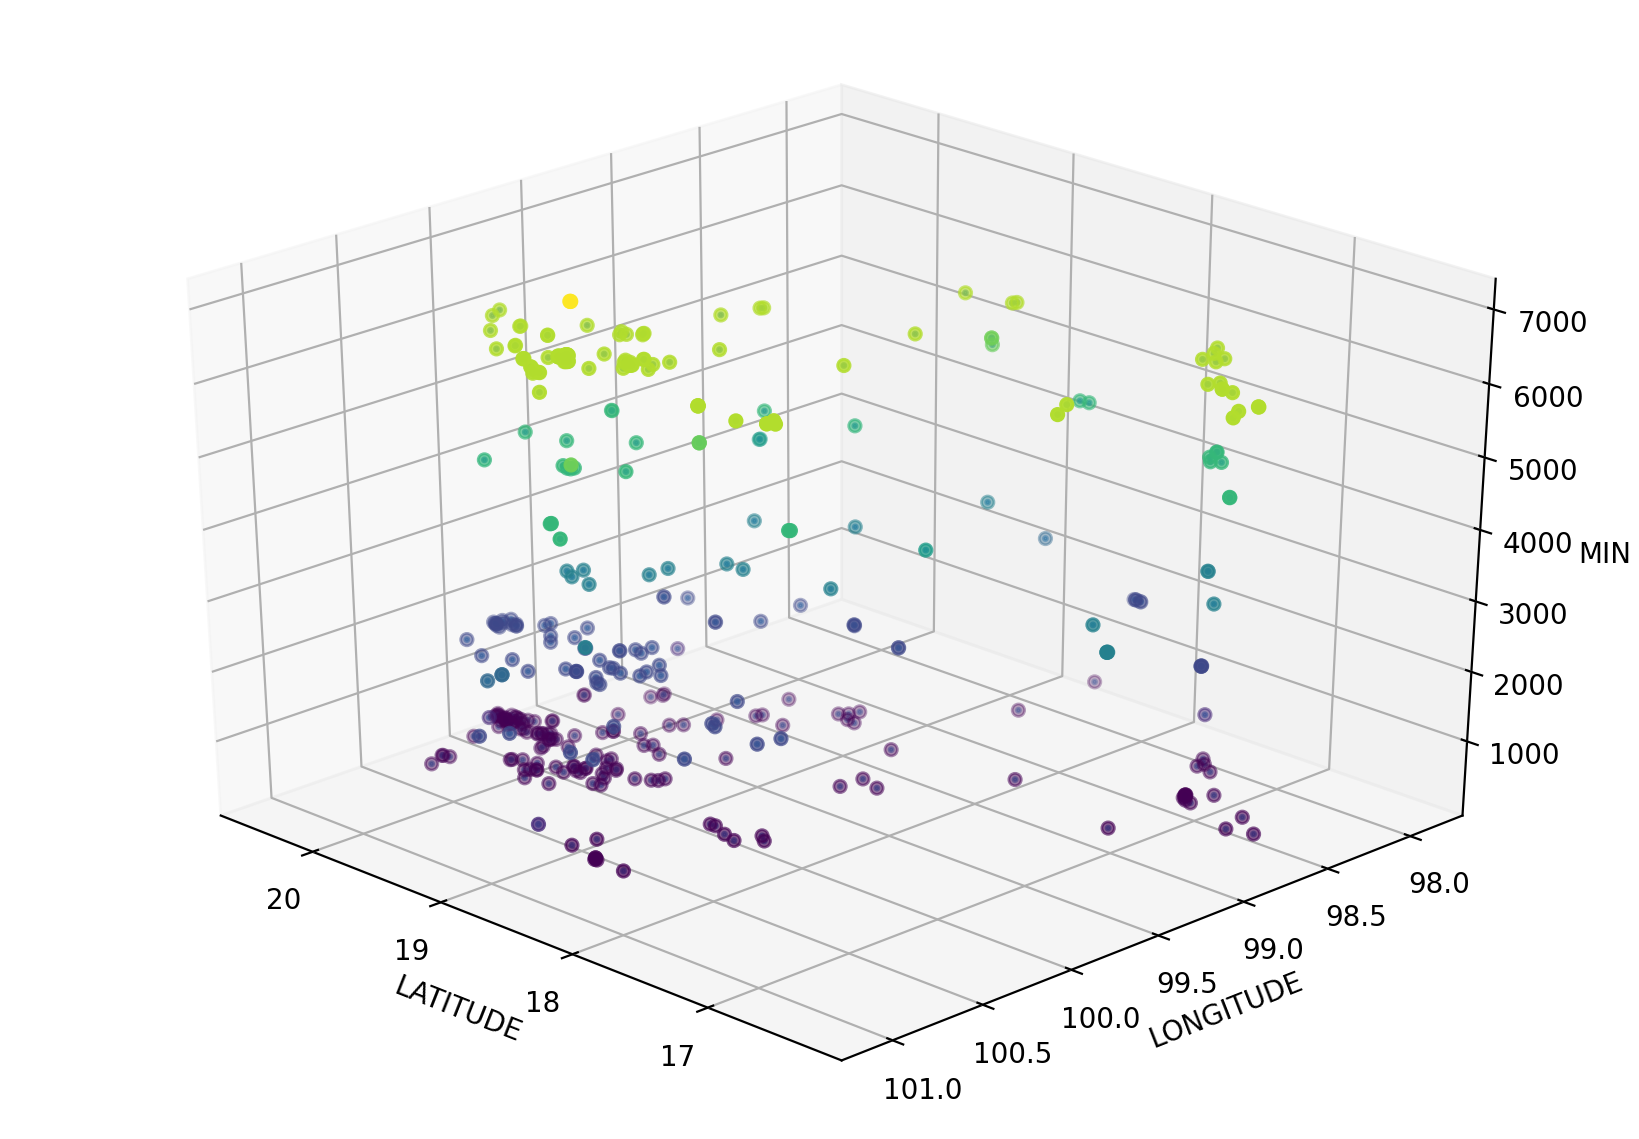

In [19]:
plt.rcParams['figure.figsize']=(8,5.5)
plt.rcParams['figure.dpi']=200

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
x=pivot['LATITUDE']
y=pivot['LONGITUDE']
z=pivot['zAxis']
ax.scatter(x,y,z,s=2)
ax.view_init(azim=135)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('MIN')
pnt3d=ax.scatter(x,y,z,c=z)

plt.show()